<a href="https://colab.research.google.com/github/SubhadipGhosh07/TimeSeries_Sales/blob/main/TimeSeries_Apexon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries for our business use case:

In [ ]:
# Importing python libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
# Reading the dataset from the local computer
from google.colab import files
uploaded = files.upload()

Saving TimeSeries_Apexon.xlsx to TimeSeries_Apexon.xlsx


In [ ]:
# reading the excel file
import io
df = pd.read_excel(io.BytesIO(uploaded['TimeSeries_Apexon.xlsx']))

In [ ]:
df.head()

,week,Rev from a Sport Store retail,Week Date
0,15-W01,9.956822e+05,2015-01-01
1,15-W02,1.175470e+06,2015-01-08
2,15-W03,1.406700e+06,2015-01-15
3,15-W04,1.042557e+06,2015-01-22
4,15-W05,1.268013e+06,2015-01-29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   week                           281 non-null    object        
 1   Rev from a Sport Store retail  271 non-null    float64       
 2   Week Date                      281 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.7+ KB


In [ ]:
# Checking the number of nulls
df.isnull().sum()

week                              0
Rev from a Sport Store retail    10
Week Date                         0
dtype: int64

In [ ]:
# Separating the training data from the test data
df_train = df.loc[df['Rev from a Sport Store retail'].isnull()==False,:]

In [ ]:
df_train.isnull().sum()

week                             0
Rev from a Sport Store retail    0
Week Date                        0
dtype: int64

In [ ]:
# Removing week from df_train1
df_train1 = df_train.copy()
df_train1.drop('week',axis=1,inplace=True)

# Setting index
# df_train1.set_index('Week Date',inplace=True)

In [ ]:
# Changing the name of columns and substituting the positions
df_train1['Revenue'] = df_train1['Rev from a Sport Store retail']
df_train1.drop('Rev from a Sport Store retail',axis=1,inplace=True)

In [ ]:
df_train1.head()

,Week Date,Revenue
0,2015-01-01,9.956822e+05
1,2015-01-08,1.175470e+06
2,2015-01-15,1.406700e+06
3,2015-01-22,1.042557e+06
4,2015-01-29,1.268013e+06


## Visualizing the Data:

In [ ]:
# # Plotting the dataset

# fig = plt.figure(figsize=(10,6))
# plt.plot(df_train1)
# fig.suptitle('Plotting week dates vs Revenue', fontsize=20)
# plt.xlabel('Week Date', fontsize=16)
# plt.ylabel('Revenue', fontsize=16)

In [ ]:
# changing the name of columns into ds and y for FBProphet
df_train1.columns = ['ds','y']
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      271 non-null    datetime64[ns]
 1   y       271 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


Text(0.5, 0.98, 'Plotting week dates vs Revenue')

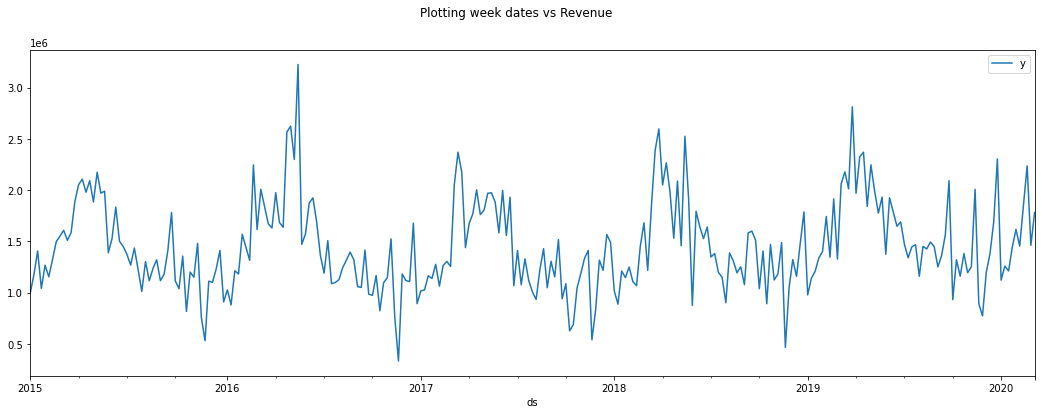

In [ ]:
# Plotting the time series data
df_train1.plot(x='ds',y='y',figsize=(18,6))
plt.suptitle('Plotting week dates vs Revenue')

In [ ]:
# Setting train and test data
train = df_train1.iloc[0:len(df_train1)-50]
test = df_train1.iloc[len(df_train1)-50:]

In [ ]:
# printing shapes of train and test data
print(train.shape, test.shape)

(221, 2) (50, 2)


In [ ]:
model = Prophet()
model.fit(train)
future_pred = model.make_future_dataframe(periods=50,freq='W')
forecast = model.predict(future_pred)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
266,2020-02-02,1.394253e+06,1.085812e+06,1.704966e+06
267,2020-02-09,1.396554e+06,1.093663e+06,1.696097e+06
268,2020-02-16,1.465956e+06,1.155821e+06,1.780864e+06
269,2020-02-23,1.607773e+06,1.297753e+06,1.922295e+06
270,2020-03-01,1.758259e+06,1.452089e+06,2.083999e+06


In [ ]:
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
# Model evaluation
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-50:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  310009.10519821465
Mean Value of Test Dataset: 1592377.2661105418


In [ ]:
# Predicting for unseen values
# For the next 20 weeks
model = Prophet()
model.fit(df_train1)
future_pred = model.make_future_dataframe(periods=10,freq='W')
forecast = model.predict(future_pred)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
plot_plotly(model, forecast)

In [ ]:
# Predicting unseen values
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
271,2020-03-08,1.961792e+06,1.643041e+06,2.279492e+06
272,2020-03-15,2.098566e+06,1.771094e+06,2.401568e+06
273,2020-03-22,2.239114e+06,1.941133e+06,2.545815e+06
274,2020-03-29,2.312341e+06,1.993687e+06,2.623729e+06
275,2020-04-05,2.265961e+06,1.958501e+06,2.593950e+06
276,2020-04-12,2.154709e+06,1.842786e+06,2.471815e+06
277,2020-04-19,2.110106e+06,1.809533e+06,2.425708e+06
278,2020-04-26,2.200333e+06,1.893204e+06,2.508895e+06
279,2020-05-03,2.340402e+06,2.040014e+06,2.653586e+06
280,2020-05-10,2.371788e+06,2.026236e+06,2.667307e+06
